In [6]:
#!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cardio_train.csv', delimiter = ';')

In [18]:
df['height'].mean()

164.35922857142856

In [21]:
df['gender'] = 'm'
df.loc[df.height < 164.35922857142856, 'gender'] = 'f'

In [29]:
len(df[df['gender'] == 'm'])

35574

In [37]:
df.groupby('gender')['alco'].mean()

gender
f    0.036775
m    0.070220
Name: alco, dtype: float64

In [56]:
smoking_pop = df[df['smoke'] == 1].groupby('gender')['gender'].count()
print(smoking_pop['m']-smoking_pop['f'])


3265


In [15]:
smoking_age = df[df['smoke'] == 1]['age'].mean()
non_smoking_age = df[df['smoke'] == 0]['age'].mean()
print(non_smoking_age - smoking_age)

414.56380348447055


In [19]:
df['BMI'] = (df['weight'] / df['height']**2)*10000
df['BMI'].mean()

27.55651255127886

In [22]:
df.groupby('gender')['BMI'].mean()

gender
f    28.664567
m    26.484216
Name: BMI, dtype: float64

In [ ]:
ІМТ жінок в середньому вище ніж у чоловіків

In [30]:
df.groupby('cardio')['BMI'].mean()

cardio
0    26.548175
1    28.566061
Name: BMI, dtype: float64

In [ ]:
У здорових людей в середньому ІМТ нижчий за нездорових.

In [51]:
healthy_people = df[(df['cardio'] == 0) & (df['alco'] == 0)].groupby('gender')['BMI']
healthy_people.mean()

gender
f    27.434586
m    25.646589
Name: BMI, dtype: float64

In [ ]:
Для здорових, невживаючих алкоголь чоловіків середній ІМТ і вправду нижчий

In [57]:
df_filtered = df[df['ap_hi'] < df['ap_lo']]
len(df_filtered)

1234

Бачимо що це лише 1234 випадки

In [60]:
print(len(df_filtered)*100/len(df))

1.762857142857143


1.76%

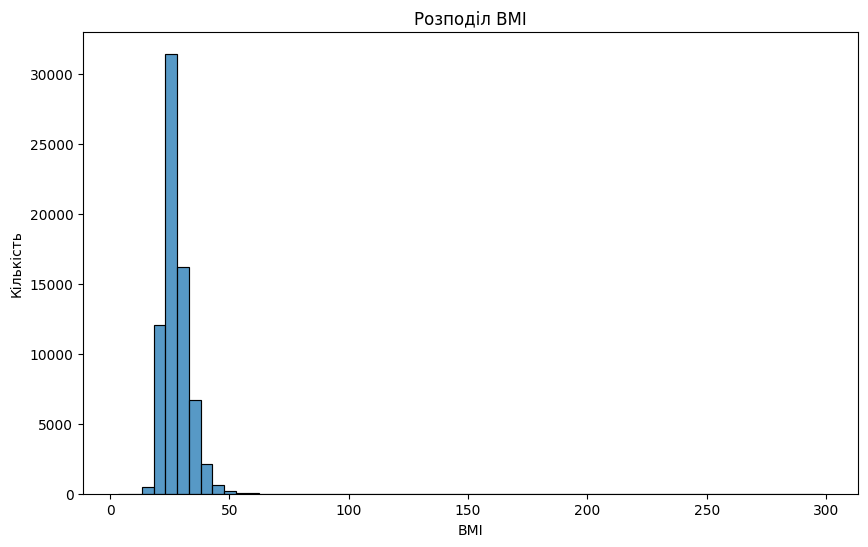

Кількість викидів: 1995


In [70]:
plt.figure(figsize=(10,6))
sns.histplot(df['BMI'], bins=60)
plt.title('Розподіл BMI')
plt.xlabel('BMI')
plt.ylabel('Кількість')
plt.show()

Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
lower_bound = Q1 - 1.5 * (Q3-Q1)
upper_bound = Q3 + 1.5 * (Q3-Q1)

outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
print(f"Кількість викидів: {len(outliers)}")

https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm#:~:text=An%20outlier%20is%20an%20observation,what%20will%20be%20considered%20abnormal.

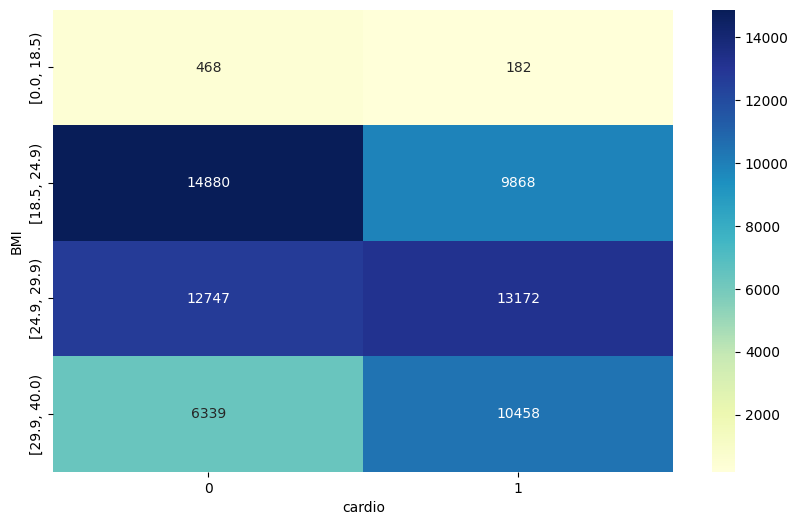

In [82]:
bins = [0, 18.5, 24.9, 29.9, 40]  
df['BMI_category'] = pd.cut(df['BMI'], bins=bins, right=False)
heatmap_data = df.groupby(['BMI_category', 'cardio']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('cardio')
plt.ylabel('BMI')
plt.show()